---

## HW 1 due Tuesday 9/5 at 11:59pm:

### Please email your code to me jegdick@uhd.edu

### Please write your name and your student ID in the email


---


(a) We mentioned that perceptron converges if the data is linearly separable. Try sklearn perceptron model for versicolor and virginica, with sepal length and petal length. What do you observe? 

(b) We created My_Perceptron class for only 2 inputs. Extend this code for 3 inputs. Investigate the iris data set and choose 3 features to classify setosa and versicolor using your code. Notice that you cannot easily plot the decision boundary now since the data is 3-dimensional, but you can still compare the actual and the predicted labels to see how your algorithm is performing. 

(c) Try to generalize My_Perceptron code so it could be used for any number of inputs. 
(Hint: Recall, that for a list ```w``` we can use ```w[-1]``` and ```w[:-1]``` to access the last value in the list and all the values expect the very last value. Also, use ``` np.dot```, NumPy dot product, to compute the pre-activation value of $z$.)

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import Perceptron
import os

In [2]:
if os.name == "nt": # home pc (windows)
    data = pd.read_csv("..\\Data Sets\iris_dataset.csv")
else:
    data = pd.read_csv("../Data Sets/iris_dataset.csv")

### Part A ###

We mentioned that perceptron converges if the data is linearly separable. Try sklearn perceptron model for versicolor and virginica, with sepal length and petal length. What do you observe? 

In [3]:
df = data.iloc[50:]
X = df[["sepal_length", "petal_length"]]
y = df[["species"]]

y = np.where(y == 'versicolor', -1, 1)
y = y.reshape(100,)

In [4]:
clf = Perceptron() # Instantiation of the model
clf.fit(X,y) # Fitting of the model

y_pred = clf.predict(X) # Prediction of the model
y_pred # An overwiew of the predictions

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1])

In [5]:
np.array_equal(y, y_pred) # a function to check the equality/equivelance of two arrays
np.sum(y != y_pred)

20

Above is a function to check if our predictions match what we know to be true.  As you can see, the two differ 20 times. Let's progress to see the consequence of this.

In [6]:
print(f"Weights are: {clf.coef_}\n\
Intercept is: {clf.intercept_}")

Weights are: [[-56.5  74.9]]
Intercept is: [-38.]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal length')

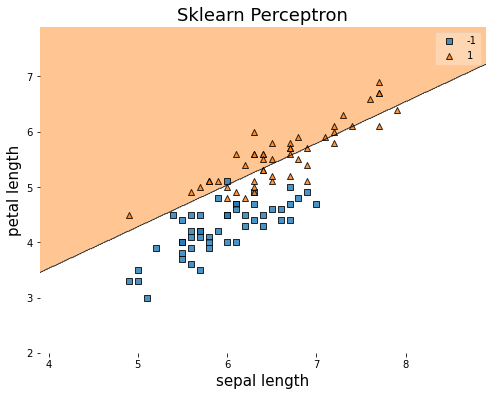

In [7]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y, clf = clf)
plt.title("Sklearn Perceptron", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15)

As we can see, the data is not linearly seperable and thus Perceptron was doomed to fail. Optimistically, it could have done worse.

### Part B ###

We created My_Perceptron class for only 2 inputs. Extend this code for 3 inputs. Investigate the iris data set and choose 3 features to classify setosa and versicolor using your code. Notice that you cannot easily plot the decision boundary now since the data is 3-dimensional, but you can still compare the actual and the predicted labels to see how your algorithm is performing. 

First, we take the class we made earlier, but we adjust for the third weight. It will essentially repeat the actions of the first two weights and sum the three instead of the two.

In [8]:
class MyPerceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.w3 = np.random.rand(1) # Add a third starting weight of some random number between 0 and 1
        self.b = np.random.rand(1)
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w2 - update*xi[1]
                self.w3 = self.w3 - update*xi[2] # Like the others, adjust the weights
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2, self.w3]) #include the 3rd weight
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

Now that the function is adjusted for 3 predictors, we can instantiate the function, select which three predictors we will use, then fit our model.

In [9]:
df = data[:-50]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [10]:
my_clf = MyPerceptron()

X = np.array(df[["sepal_length", "petal_length", "petal_width"]])

# Call the fit method 
my_clf.fit(X, y)

Next, we can formulate our predictions from our function and reshape them into a format that's more easily compared.

In [11]:
y_pred = my_clf.predict(X)
y_pred = y_pred.reshape(100,)

Again we can sum the number of times that our predictions differed from the truth to see the efficacy of the model. As we see below, it's as effective with 3 predictors compared to only 2 predictors.

In [12]:
np.sum(y != y_pred)
np.array_equal(y, y_pred)

True

### Part C ###

Try to generalize My_Perceptron code so it could be used for any number of inputs. 
(Hint: Recall, that for a list ```w``` we can use ```w[-1]``` and ```w[:-1]``` to access the last value in the list and all the values expect the very last value. Also, use ``` np.dot```, NumPy dot product, to compute the pre-activation value of $z$.)

In [13]:
class MyPerceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        self.w = []
        for i in range(X.shape[1]):
            self.w.append(np.random.rand(1))
        self.b = np.random.rand(1)                          # For clarity, I have left w and
        self.w = np.array(self.w).reshape(X.shape[1])       # and b seperate
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for i, xi in enumerate(X):                              # i is an element iterator, while xi is value for that row
                update = self.eta * (self.predict(xi) - y[i])
                self.w = self.w - update*xi
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

In [14]:
my_clf = MyPerceptron()

X = np.array(df[["sepal_length", "petal_length", "petal_width", "sepal_width"]])
y = np.where(df[["species"]] == 'versicolor', -1, 1)

# Call the fit method 
my_clf.fit(X, y)

In [15]:
test = MyPerceptron()
test.fit(X,y)
test.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])